### Analisi dell'adozione a livello mondiale dei Veicoli Elettrici (EV), relazionata alle emissioni di CO2 e alle leggi sulle emissioni.

Lo studio analizza dati con scope temporali variabili a partire dalle seguenti fonti:
- [www.iea.org](https://www.iea.org) -- Dati sui veicoli elettrici fino al 2023 + proiezioni fino al 2035
- https://ourworldindata.org/ -- Dati sulle emissioni CO2 fino al 2022
- [climate.ec.europa.eu](https://climate.ec.europa.eu/eu-action/european-climate-law_en) -- European Climate Law, entrata in vigore il 29 Luglio 2021
- [European Green Deal](https://en.wikipedia.org/wiki/European_Green_Deal)
- [wikipedia.org](https://en.wikipedia.org/wiki/List_of_battery_electric_vehicles) -- Lista di veicoli elettrici a batteria (BEV)

L'analisi studierà:
1. Andamenti delle vendite degli EV nel mondo
2. Andamenti dell'adozione a livello mondiale degli EV
3. Andamenti delle emissioni di CO2 globali
4. Influenza della European Climate Law sugli andamenti di cui sopra
5. Previsioni sui modelli di EV disponibili e sulle auto elettriche circolanti

In [95]:
#Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ev_data = pd.read_csv("data/IEA Global EV Data 2024.csv",encoding="utf-8",delimiter=",")
co2_data = pd.read_csv("data/annual-co2-emissions-per-country.csv", encoding="utf-8",delimiter=",")
ev_models_NoChina = pd.read_csv("data/available_ev_models(outside-china).csv",encoding="utf-8",delimiter=",")
ev_models_china = pd.read_csv("data/available_ev_models(china).csv",encoding="utf-8",delimiter=",")

In [96]:
## DataFrame Global EV
ev_df = pd.DataFrame(ev_data)
ev_df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


In [97]:
## DataFrame Global CO2 Emissions
co2_df = pd.DataFrame(co2_data)
co2_df

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


In [98]:
### Altri DataFrame utilizzati nelle analisi successive ###

#### Vendite
## World
ev_sales_world_historical = ev_df[(ev_df['parameter'] == 'EV sales') & (ev_df['region'] == 'World') & (ev_df['category'] == 'Historical') & (ev_df['year'] < 2024)]
ev_sales_world_projection = ev_df[(ev_df['parameter'] == 'EV sales') & (ev_df['region'] == 'World') & (ev_df['category'] == 'Projection-STEPS') & (ev_df['year'] > 2024)]
ev_sales_world = pd.concat([ev_sales_world_historical, ev_sales_world_projection], ignore_index=True)

# World By Year
ev_sales_world_by_year = ev_sales_world.groupby('year')['value'].sum().reset_index()
ev_sales_world_historical_by_year = ev_sales_world_historical.groupby('year')['value'].sum().reset_index()

#### Sales Share (Vendite EV in percentuale)
## World
ev_sales_share_world_historical = ev_df[(ev_df['parameter'] == 'EV sales share') & (ev_df['region'] == 'World') & (ev_df['category'] == 'Historical') & (ev_df['year'] < 2024)]
ev_sales_share_world_projection = ev_df[(ev_df['parameter'] == 'EV sales share') & (ev_df['region'] == 'World') & (ev_df['category'] == 'Projection-STEPS') & (ev_df['year'] > 2024)]
ev_sales_share_world = pd.concat([ev_sales_share_world_historical, ev_sales_share_world_projection], ignore_index=True)

# World By Year & By Mode
ev_sales_share_world_by_year = ev_sales_share_world.groupby(['year', 'mode'])['value'].sum().unstack().fillna(0)

# World - Cars
ev_cars_sales_share_by_year = ev_sales_share_world_by_year['Cars'].reset_index()
ev_cars_sales_share_historical_by_year = ev_cars_sales_share_by_year[ev_cars_sales_share_by_year['year'] <= 2024]


#### Stock (Veicoli Circolanti)
# World
ev_stock_world = ev_df[(ev_df['parameter'] == 'EV stock') & (ev_df['region'] == 'World')]

# World By Year
ev_stock_world_by_year = ev_stock_world.groupby(['year', 'powertrain'])['value'].sum().unstack().fillna(0)

#### Stock Share (Veicoli Circolanti in Percentuale)
# World
ev_stock_share_world_historical = ev_df[(ev_df['parameter'] == 'EV stock share') & (ev_df['region'] == 'World') & (ev_df['category'] == 'Historical') & (ev_df['year'] < 2024)]
ev_stock_share_world_projection = ev_df[(ev_df['parameter'] == 'EV stock share') & (ev_df['region'] == 'World') & (ev_df['category'] == 'Projection-STEPS') & (ev_df['year'] > 2024)]
ev_stock_share_world = pd.concat([ev_stock_share_world_historical, ev_stock_share_world_projection], ignore_index=True)

# World By Year & By Mode
ev_stock_share_world_by_year = ev_stock_share_world.groupby(['year', 'mode'])['value'].sum().unstack().fillna(0)

# World - Cars
ev_cars_stock_share_by_year = ev_stock_share_world_by_year['Cars'].reset_index()
ev_cars_stock_share_historical_by_year = ev_cars_stock_share_by_year[ev_cars_stock_share_by_year['year'] <= 2024]

#### CO2
# Filtered
co2_recent = co2_df[co2_df['Year'] > 1999]

## World
co2_world = co2_df[co2_df['Entity'] == 'World']
co2_world_recent = co2_recent[co2_recent['Entity'] == 'World']
# By Year
co2_world_by_year = co2_world.groupby('Year')['Annual CO₂ emissions'].sum().reset_index()
co2_world_recent_by_year = co2_world_recent.groupby('Year')['Annual CO₂ emissions'].sum().reset_index()

## Europa
co2_europe_recent = co2_recent[co2_recent['Entity'] == 'Europe']
# By Year
co2_europe_recent_by_year = co2_europe_recent

## Rest of world
co2_rest_of_world_recent = co2_recent[(co2_recent['Entity'] == 'United States') | (co2_recent['Entity'] == 'Africa') | (co2_recent['Entity'] == 'Asia') | (co2_recent['Entity'] == 'Oceania')]
# By Year
co2_rest_of_world_by_year = co2_rest_of_world_recent.groupby('Year')['Annual CO₂ emissions'].sum().reset_index()


#### **1. Analisi delle vendite, a livello mondiale, dei Veicoli Elettrici**

In [99]:
# Dati sulle vendite di EV raggruppati per anno
ev_sales_world_by_year

,year,value
0,2010,10318.0
1,2011,53778.0
2,2012,133079.0
3,2013,216041.0
4,2014,351555.0
5,2015,653630.0
6,2016,917621.0
7,2017,1430348.0
8,2018,2269497.0
9,2019,2248327.0


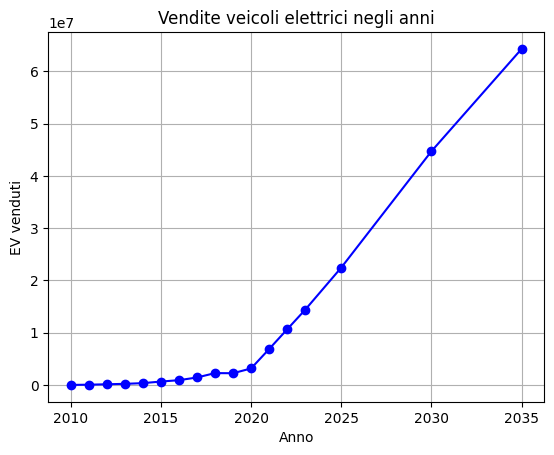

In [100]:
# Andamento vendite veicoli elettrici
plt.figure()
plt.plot(ev_sales_world_by_year['year'], ev_sales_world_by_year['value'], marker='o', linestyle='-', color='b')
plt.title('Vendite veicoli elettrici negli anni')
plt.xlabel('Anno')
plt.ylabel('EV venduti')
plt.grid(True)
plt.show()

Da questo grafico è facilmente visibile l'aumento dei veicoli elettrici venduti, specialmente a partire dal 2020.\
Vedremo in seguito le possibili cause e motivazioni dietro a questi dati.

#### **2. Aumento dell'adozione di veicoli elettrici**

Analizziamo ora l'adozione a livello mondiale dei veicoli elettrici.\
Di seguito i dati sulla quantità di EV circolanti, raggruppati per anno e suddivisi per tipo di veicolo elettrico.
- BEV = Battery Electric Vehicle, veicoli che fanno uso esclusivamente di batteria e motore elettrico
- FCEV = Fuel Cell Electric Vehicles, veicoli che si affidano a un motore elettrico alimentato da celle a combustibile idrogeno
- PHEV = Plug-in Hybrid Electric Vehicle, veicoli ibridi, che si affidano sia a un motore a combustione sia a un motore elettrico

In [101]:
ev_stock_world_by_year

powertrain,BEV,FCEV,PHEV
year,,,
2010,36700.0,57.0,610.0
2011,80300.0,89.0,9920.0
2012,154600.0,117.0,70990.0
2013,276400.0,208.0,162770.0
2014,482600.0,360.0,308960.0
2015,915000.0,1265.0,543536.0
2016,1575000.0,3912.0,842039.0
2017,2520000.0,7933.0,1233752.0
2018,4150000.0,13570.0,1935866.0


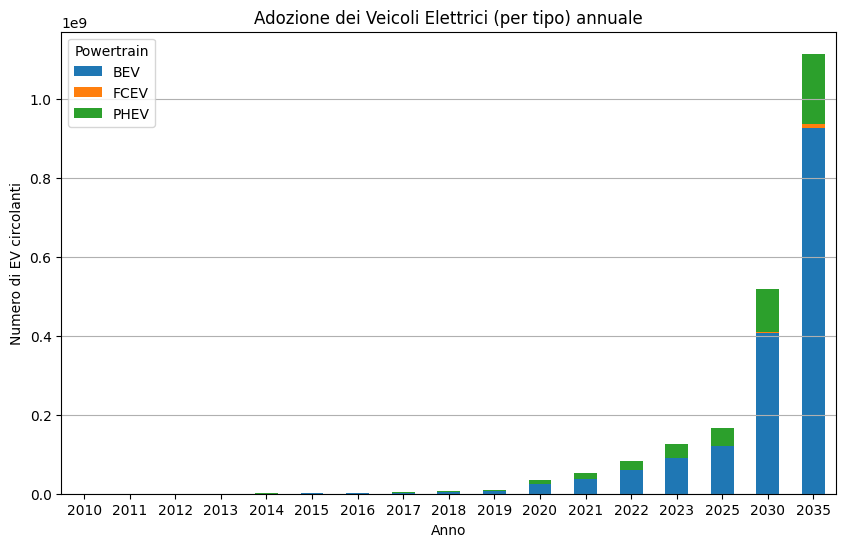

In [102]:
# Creare il grafico
ev_stock_world_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Adozione dei Veicoli Elettrici (per tipo) annuale')
plt.xlabel('Anno')
plt.ylabel('Numero di EV circolanti')
plt.xticks(rotation=0)
plt.legend(title='Powertrain')
plt.grid(axis='y')
plt.show()

#### 2b. Stock share vs Sales share


In [103]:
ev_stock_share_world_by_year

mode,Buses,Cars,Trucks,Vans
year,,,,
2010,0.049,0.0023,0.0019,0.0062
2011,0.062,0.0075,0.0022,0.0088
2012,0.069,0.0200,0.0026,0.0170
2013,0.082,0.0400,0.0036,0.0250
2014,0.180,0.0710,0.0038,0.0330
2015,0.630,0.1200,0.0250,0.0520
2016,1.100,0.1900,0.0870,0.0890
2017,1.500,0.2800,0.1800,0.1500
2018,1.900,0.4400,0.2200,0.2300


In [104]:
ev_sales_share_world_by_year

mode,Buses,Cars,Trucks,Vans
year,,,,
2010,0.052,0.011,0.00073,0.019
2011,0.048,0.068,0.00300,0.041
2012,0.110,0.160,0.00049,0.120
2013,0.210,0.270,0.00069,0.130
2014,0.510,0.410,0.00090,0.120
2015,2.800,0.680,0.31000,0.290
2016,4.000,0.900,0.81000,0.240
2017,5.000,1.400,1.20000,0.870
2018,5.000,2.400,0.60000,0.780


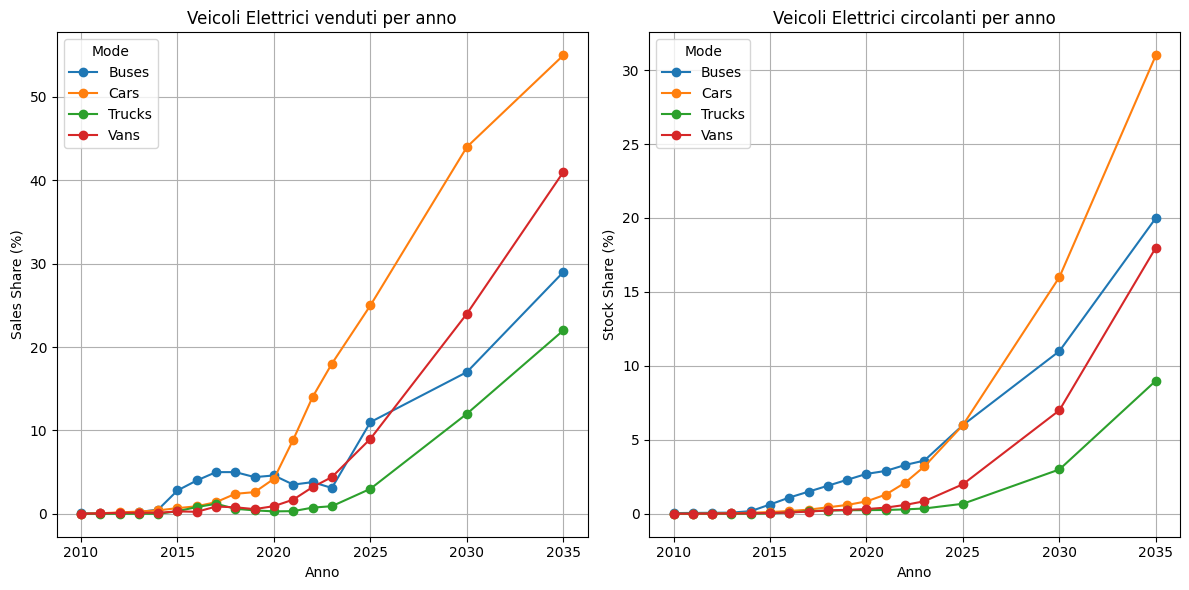

In [105]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# dati sulla percentuale di EV venduti
ev_sales_share_world_by_year.plot(ax=ax[0], marker='o', linestyle='-')
ax[0].set_title('Veicoli Elettrici venduti per anno')
ax[0].set_xlabel('Anno')
ax[0].set_ylabel('Sales Share (%)')
ax[0].legend(title='Mode')
ax[0].grid(True)

# dati sulla percentuale di EV circolanti
ev_stock_share_world_by_year.plot(ax=ax[1], marker='o', linestyle='-')
ax[1].set_title('Veicoli Elettrici circolanti per anno')
ax[1].set_xlabel('Anno')
ax[1].set_ylabel('Stock Share (%)')
ax[1].legend(title='Mode')
ax[1].grid(True)

# stampa la figura con entrambi i subplot
plt.tight_layout()
plt.show()


La prima cosa che salta all'occhio è un grosso aumento nella percentuale di Veicoli Elettrici venduti annualmente.\
Anche la quantità di EV in circolazione segue un trend rialzista molto simile.

Vediamo in maniera più chiara una comparazione tra i veicoli venduti e quelli in circolazione, prendendo in esame solo le auto in questo caso.

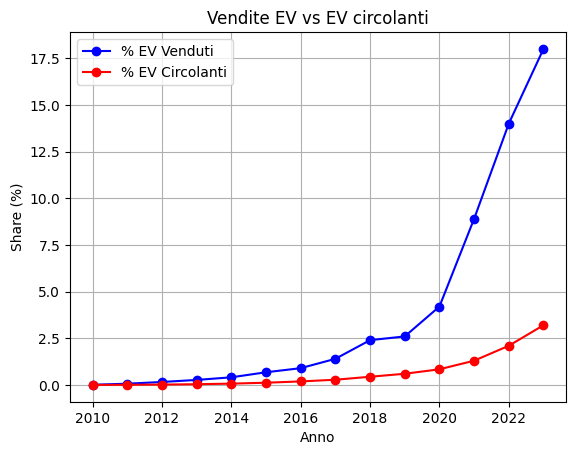

In [106]:
plt.figure()
plt.plot(ev_cars_sales_share_historical_by_year.year.values, ev_cars_sales_share_historical_by_year.Cars.values, marker='o', linestyle='-', label='% EV Venduti', color='b')
plt.plot(ev_cars_stock_share_historical_by_year.year.values, ev_cars_stock_share_historical_by_year.Cars.values, marker='o', linestyle='-', label='% EV Circolanti', color='r')
plt.title('Vendite EV vs EV circolanti')
plt.xlabel('Anno')
plt.ylabel('Share (%)')
plt.legend()
plt.grid(True)
plt.show()

#### **3. Andamento delle emissioni di CO2**

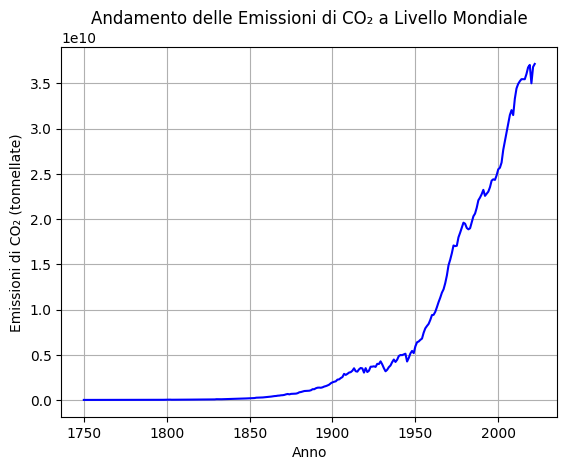

In [107]:
plt.figure()
plt.plot(co2_world_by_year['Year'], co2_world_by_year['Annual CO₂ emissions'], marker='', linestyle='-', color='b')
plt.title('Andamento delle Emissioni di CO₂ a Livello Mondiale')
plt.xlabel('Anno')
plt.ylabel('Emissioni di CO₂ (tonnellate)')
plt.grid(True)
plt.show()


#### **4. Influenza della European Climate Law**
Andiamo ora a vedere come questo trend è stato influenzato dalla legge European Climate Law, pubblicata nella Gazzetta Ufficiale il 9 Luglio 2021 ed entrata in vigore 29 Luglio 2021.

In [108]:
european_green_deal_year = 2019
european_climate_law_year = 2021
fit_55_year = 2021

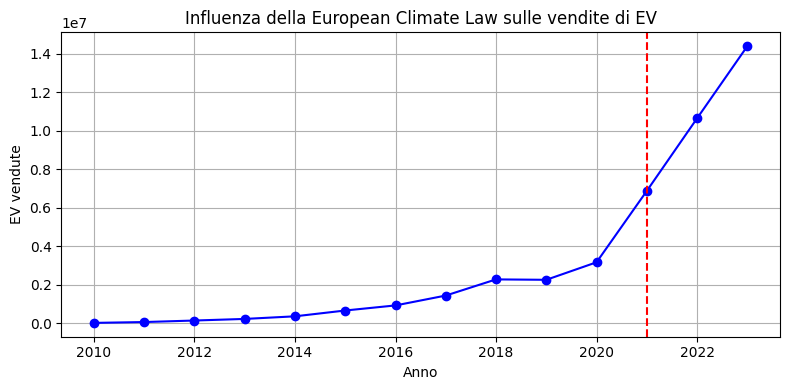

In [124]:
plt.figure(figsize=(8, 4))
plt.plot(ev_sales_world_historical_by_year['year'], ev_sales_world_historical_by_year['value'], marker='o', linestyle='-', color='b')
plt.title('Influenza della European Climate Law sulle vendite di EV')
plt.xlabel('Anno')
plt.ylabel('EV vendute')
plt.axvline(x=european_climate_law_year, color='r', linestyle='--', label='European Climate Law 2021')
plt.grid(True)
plt.tight_layout()
plt.show()

Si nota nel grafico di cui sopra come l'entrata in vigore della European Climate Law, segnata dalla linea rossa, abbia causato un boost alle vendite delle auto elettriche.\
Si tratta di una legge europea che stabilisce un **obiettivo giuridicamente vincolante di emissioni nette di gas serra pari a zero entro il 2050**, nonché un obiettivo per il 2030 di riduzione di almeno il 55% delle emissioni nette di gas serra rispetto al 1990.

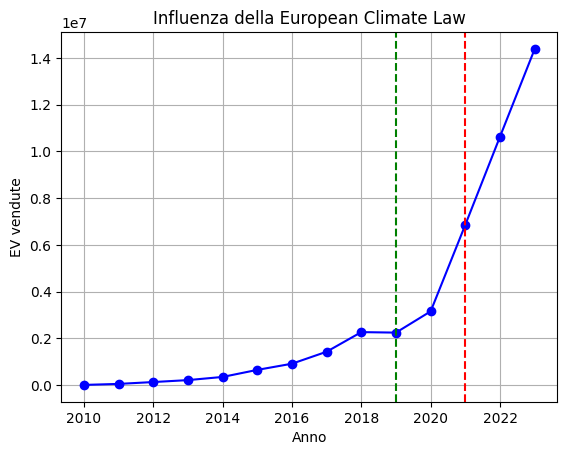

In [110]:
plt.figure()
plt.plot(ev_sales_world_historical_by_year['year'], ev_sales_world_historical_by_year['value'], marker='o', linestyle='-', color='b')
plt.title('Influenza della European Climate Law')
plt.xlabel('Anno')
plt.ylabel('EV vendute')
plt.axvline(x=european_green_deal_year, color='g', linestyle='--', label='European Green Deal 2019')
plt.axvline(x=european_climate_law_year, color='r', linestyle='--', label='European Climate Law 2021')
plt.grid(True)
plt.show()

Ma sempre dal grafico è evidente che l'adozione degli *EV* ha iniziato ad aumentare considerevolmente già prima del 2021.\
Infatti, l'*11 Dicembre 2019* venne presentato per la prima volta l'**European Green Deal**, indicato dalla linea verde.

#### **4a. Effetti sulle emissioni di CO2**

Vediamo ora gli effetti della European Climate Law sulle emissioni di CO2 nel mondo.\
Successivamente scopriamo anche se ci sono evidenti differenze sugli effetti sulle emissioni Europee rispetto al resto del mondo.

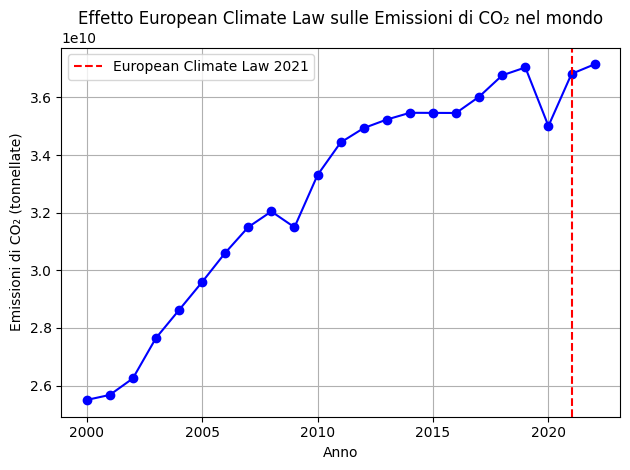

In [111]:
plt.figure()
plt.plot(co2_world_recent_by_year['Year'], co2_world_recent_by_year['Annual CO₂ emissions'], marker='o', linestyle='-', color='b')
plt.axvline(x=european_climate_law_year, color='r', linestyle='--', label='European Climate Law 2021')
plt.title('Effetto European Climate Law sulle Emissioni di CO₂ nel mondo')
plt.xlabel('Anno')
plt.ylabel('Emissioni di CO₂ (tonnellate)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

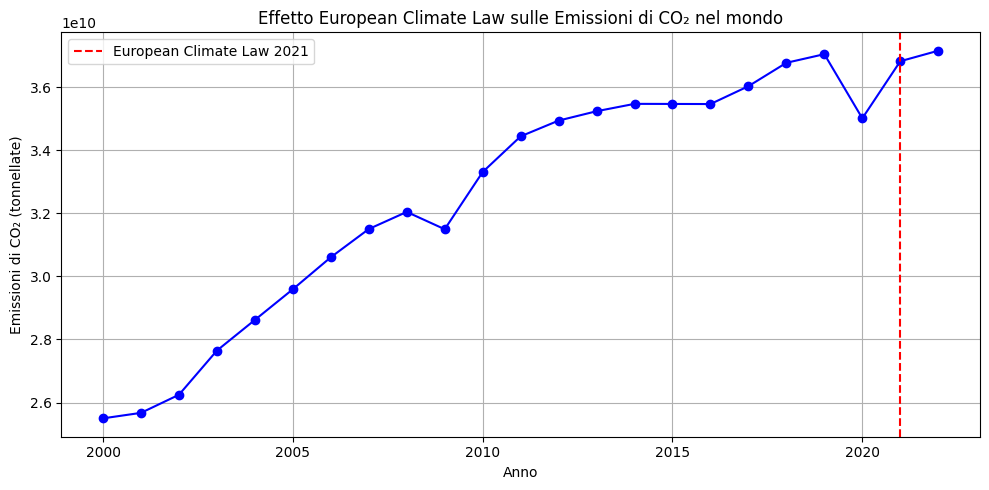

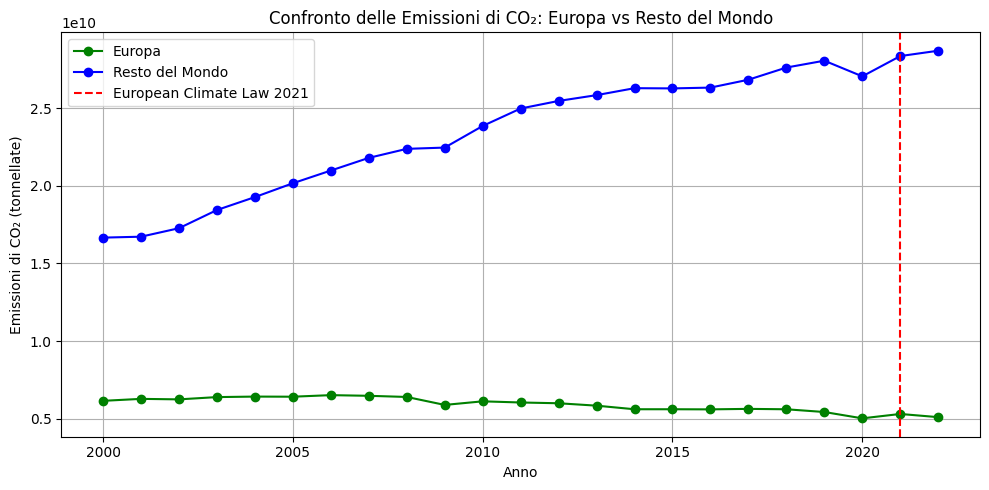

In [128]:
# Grafico sull'andamento delle emissioni di CO2 a livello mondiale
plt.figure(figsize=(10, 5))
plt.plot(co2_world_recent_by_year['Year'], co2_world_recent_by_year['Annual CO₂ emissions'], marker='o', linestyle='-', color='b')
plt.axvline(x=european_climate_law_year, color='r', linestyle='--', label='European Climate Law 2021')
plt.title('Effetto European Climate Law sulle Emissioni di CO₂ nel mondo')
plt.xlabel('Anno')
plt.ylabel('Emissioni di CO₂ (tonnellate)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Grafico sull'andamento delle emissioni di CO2 in Europa e nel resto del mondo
plt.figure(figsize=(10, 5))

# Europa
plt.plot(co2_europe_recent_by_year['Year'], co2_europe_recent_by_year['Annual CO₂ emissions'], marker='o', linestyle='-', color='g', label='Europa')
# Resto del mondo
plt.plot(co2_rest_of_world_by_year['Year'], co2_rest_of_world_by_year['Annual CO₂ emissions'], marker='o', linestyle='-', color='b', label='Resto del Mondo')
# Linea per la European Climate Law
plt.axvline(x=european_climate_law_year, color='r', linestyle='--', label='European Climate Law 2021')

plt.title('Confronto delle Emissioni di CO₂: Europa vs Resto del Mondo')
plt.xlabel('Anno')
plt.ylabel('Emissioni di CO₂ (tonnellate)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Vediamo più nel dettaglio la variazione percentuale in Europa, confrontata con il resto del mondo

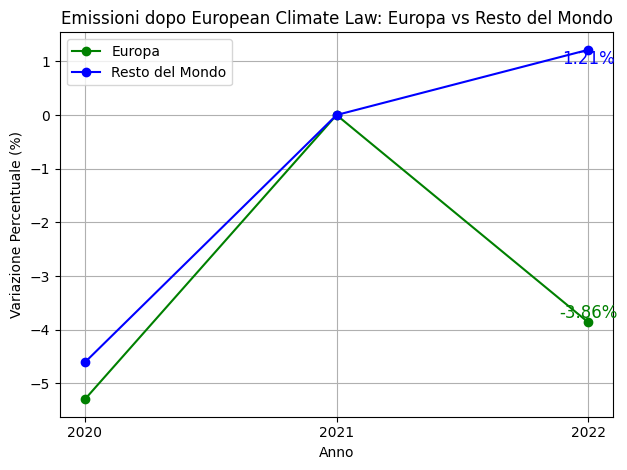

In [129]:
# Per una vista più dettagliata, prendiamo in scope i dati dal 2020 in poi
co2_europe_2020_onward = co2_europe_recent_by_year[co2_europe_recent_by_year['Year'] >= 2020].copy()
co2_rest_of_world_2020_onward = co2_rest_of_world_by_year[co2_rest_of_world_by_year['Year'] >= 2020].copy()

# Variazione percentuale per Europa
emissions_2021_europe = co2_europe_2020_onward[co2_europe_2020_onward['Year'] == european_climate_law_year]['Annual CO₂ emissions'].values[0]
co2_europe_2020_onward['Variazione Percentuale Europa'] = (
    (co2_europe_2020_onward['Annual CO₂ emissions'] - emissions_2021_europe) / emissions_2021_europe) * 100

# Variazione percentuale per il resto del mondo
emissions_2021_rest_of_world = co2_rest_of_world_2020_onward[co2_rest_of_world_2020_onward['Year'] == european_climate_law_year]['Annual CO₂ emissions'].values[0]
co2_rest_of_world_2020_onward['Variazione Percentuale Resto del Mondo'] = (
    (co2_rest_of_world_2020_onward['Annual CO₂ emissions'] - emissions_2021_rest_of_world) / emissions_2021_rest_of_world) * 100

europe_co2var_2022 = co2_europe_2020_onward[co2_europe_2020_onward['Year'] == 2022]['Variazione Percentuale Europa'].values[0]
rest_of_world_co2var_2022 = co2_rest_of_world_2020_onward[co2_rest_of_world_2020_onward['Year'] == 2022]['Variazione Percentuale Resto del Mondo'].values[0]

plt.figure()

plt.plot(co2_europe_2020_onward['Year'], co2_europe_2020_onward['Variazione Percentuale Europa'], marker='o', linestyle='-', color='g', label='Europa')

plt.plot(co2_rest_of_world_2020_onward['Year'], co2_rest_of_world_2020_onward['Variazione Percentuale Resto del Mondo'], marker='o', linestyle='-', color='b', label='Resto del Mondo')

plt.title('Emissioni dopo European Climate Law: Europa vs Resto del Mondo')
plt.xlabel('Anno')
plt.ylabel('Variazione Percentuale (%)')
plt.xticks([2020, 2021, 2022])
plt.grid(True)
plt.legend()
plt.text(2022, europe_co2var_2022, f'{europe_co2var_2022:.2f}%', color='g', fontsize=12, ha='center', va='bottom')
plt.text(2022, rest_of_world_co2var_2022, f'{rest_of_world_co2var_2022:.2f}%', color='b', fontsize=12, ha='center', va='top')
plt.annotate(
        "European\nClimate Law",
        xy=(0,0), arrowprops={'arrowstyle':'->'}, xytext=(0,0))
plt.tight_layout()
plt.show()


Si può notare che, dopo il consistente calo nel 2020 (causato dal Covid-19), nel 2021 si è tornati su un quantitativo "normale" di Emissioni a livello globale.\
Nel 2022 però, anno successivo all'entrata in vigore della **European Climate Law**, si è registrato un calo del *3,86%* nelle emissioni Europee, rispetto ad un aumento del *1,21%* nel resto del mondo.

Un calo sì significativo, ma ancora non sufficiente, che segna comunque un trend probabilmente utile a conseguire l'obiettivo europeo di diventare ***Climate Neutral*** entro il 2050.

Contestualmente a questi obiettivi, impostati con la **European Climate Law**, sono stati emanati nel 2021 una serie di regolamenti volti <u>specificatamente alla riduzione delle emissioni per Auto e Furgoni</u>, di cui parleremo successivamente.

#### **4b. Regolamenti sui Veicoli a Zero Emissioni**

Come già accennato, poco dopo l'approvazione della **European Climate Law** abbiamo visto l'introduzione (sempre Europea) del ***Fit for 55 Package***.\
Questo pacchetto, proposto nel Luglio del 2021, include delle proposte volte alla riduzione drastica delle emissioni di CO2 per i Veicoli.\
Gli obiettivi principali di questi regolamenti sono:
1. ***2030:*** Riduzione delle emissioni delle auto nuove **del 55% rispetto ai livelli del 2021**
2. ***2035:*** Emissioni **pari a 0** per tutti i veicoli venduti nell'UE.

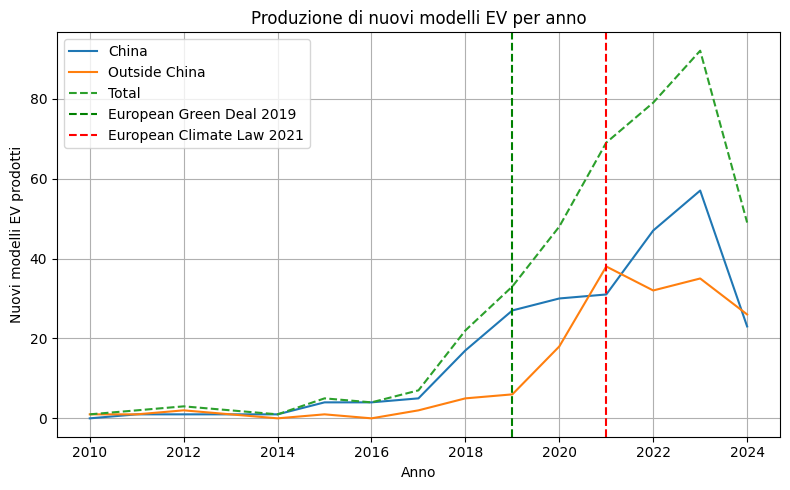

In [131]:
# dati sui modelli EV disponibili raggruppati per anno
ev_models_china_by_year = ev_models_china.groupby('Calendar year produced').size()
ev_models_NoChina_by_year = ev_models_NoChina.groupby('Calendar year produced').size()

# concatenazione dei dataframe
ev_models_total_by_year = pd.DataFrame({
    'China': ev_models_china_by_year,
    'Outside China': ev_models_NoChina_by_year
}).fillna(0)

# disponibilità totale
ev_models_total_by_year['Total'] = ev_models_total_by_year['China'] + ev_models_total_by_year['Outside China']

plt.figure(figsize=(8,5))
plt.plot(ev_models_total_by_year.index, ev_models_total_by_year['China'], label='China')
plt.plot(ev_models_total_by_year.index, ev_models_total_by_year['Outside China'], label='Outside China')
plt.plot(ev_models_total_by_year.index, ev_models_total_by_year['Total'], label='Total', linestyle='--')

plt.xlabel('Anno')
plt.ylabel('Nuovi modelli EV prodotti')
plt.title('Produzione di nuovi modelli EV per anno')
plt.axvline(x=european_green_deal_year, color='g', linestyle='--', label='European Green Deal 2019')
plt.axvline(x=european_climate_law_year, color='r', linestyle='--', label='European Climate Law 2021')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

È interessante notare come, nonostante le leggi europee abbiano aiutato nell'aumento della produzione di nuovi modelli di EV, il trend rialzista è iniziato già da prima.

Proprio la Cina, in particolare, sembra aver potenziato in modo consistente l'adozione del motore elettrico.

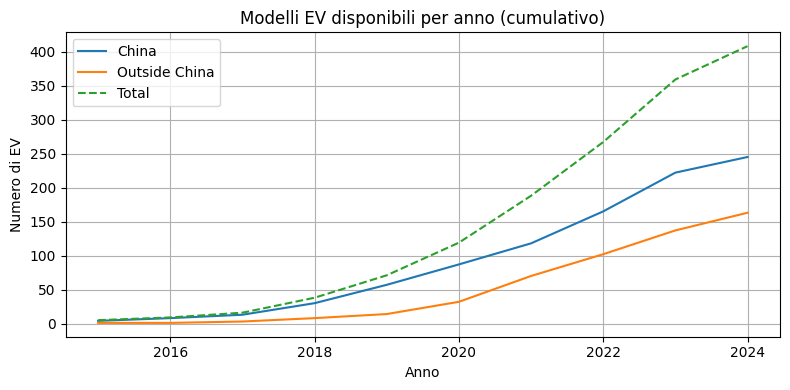

In [132]:
# Focus sui dati a partire dal 2015
ev_models_total_by_year2015 = ev_models_total_by_year[ev_models_total_by_year.index >= 2015]

# mostro dati cumulativi sui modelli disponibili ogni anno
ev_models_cumulative_by_year2015 = ev_models_total_by_year2015.cumsum()

plt.figure(figsize=(8,4))
plt.plot(ev_models_cumulative_by_year2015.index, ev_models_cumulative_by_year2015['China'], label='China')
plt.plot(ev_models_cumulative_by_year2015.index, ev_models_cumulative_by_year2015['Outside China'], label='Outside China')
plt.plot(ev_models_cumulative_by_year2015.index, ev_models_cumulative_by_year2015['Total'], label='Total', linestyle='--')

plt.xlabel('Anno')
plt.ylabel('Numero di EV')
plt.title('Modelli EV disponibili per anno (cumulativo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **5. Previsioni e Conclusioni**

Proviamo ora a fare una previsione sugli andamenti futuri, sulla base delle analisi già effettuate.
Utilizzeremo il modello polinomiale, in quanto presumibilmente più adatto al tipo di crescita che stiamo analizzando.


In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
#### 1. Previsione sui modelli di EV disponibili in futuro

# definisco i dati storici cumulativi negli anni
ev_models_total_by_year['Total'] = ev_models_total_by_year['China'] + ev_models_total_by_year['Outside China']
ev_models_cumulative_by_year = ev_models_total_by_year.cumsum()

# preparo i dati per il modello
years = ev_models_total_by_year.index.values.reshape(-1, 1)
total_models = ev_models_cumulative_by_year['Total'].values

# imposto un modello polinomiale quadratico
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(years)

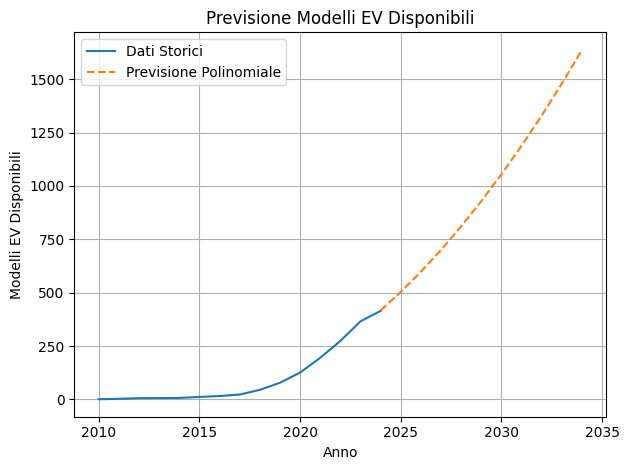

In [118]:
# addestro un modello di regressione lineare sui dati precedentemente definiti
# anche se lineare, il modello si adatterà ai dati polinomiali creati
from sklearn.linear_model import LinearRegression

model_poly = LinearRegression()
model_poly.fit(years_poly, total_models) # il modello impara i coefficienti della funzione polinomiale più adatta ai dati storici

# definisco un periodo futuro di 10 anni
future_years = np.arange(2024, 2035).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
predicted_total_models_poly = model_poly.predict(future_years_poly)


plt.figure()
plt.plot(years, total_models, label='Dati Storici')
plt.plot(future_years, predicted_total_models_poly, label='Previsione Polinomiale', linestyle='--')
plt.xlabel('Anno')
plt.ylabel('Modelli EV Disponibili')
plt.title('Previsione Modelli EV Disponibili')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


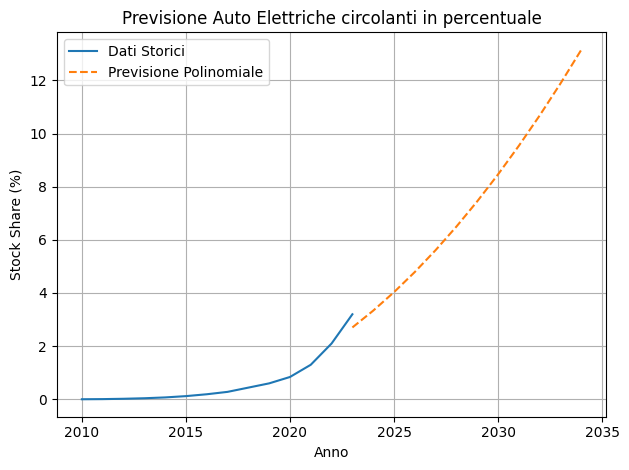

In [119]:
#### 2. Previsione sul numero di auto elettriche circolanti in futuro


# raggruppo per anno i dati storici a disposizione
ev_cars_stock_share_historical_by_year

# definisco i dati storici per il modello
years_stock_share = ev_cars_stock_share_historical_by_year.year.values.reshape(-1, 1)
total_ev_stock_share = ev_cars_stock_share_historical_by_year['Cars'].values.reshape(-1,1)

# preparo il modello
poly = PolynomialFeatures(degree=2)
years_poly = poly.fit_transform(years_stock_share)

# addestro un modello di regressione lineare sui dati precedentemente definiti
# anche se lineare, il modello si adatterà ai dati polinomiali creati
model_poly = LinearRegression()
model_poly.fit(years_poly, total_ev_stock_share)

# definisco un periodo futuro di 10 anni
future_years = np.arange(2023, 2035).reshape(-1, 1)
future_years_poly = poly.transform(future_years)

# previsione per i prossimi 10 anni
predicted_stock_share_poly = model_poly.predict(future_years_poly)

plt.figure()
plt.plot(years_stock_share, total_ev_stock_share, label='Dati Storici')
plt.plot(future_years, predicted_stock_share_poly, label='Previsione Polinomiale', linestyle='--')
plt.xlabel('Anno')
plt.ylabel('Stock Share (%)')
plt.title('Previsione Auto Elettriche circolanti in percentuale')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In conclusione, possiamo affermare che la transizione verso la mobilità elettrica sia sostanzialmente inevitabile.\
Abbiamo analizzato come lo sviluppo di veicoli elettrici abbia subito un forte trend di crescita, aiutato anche da alcune scelte politiche.

I produttore di veicoli, specialmente automobili, stanno via via convertendo il parco auto a vetture elettriche, mentre alcuni governi hanno offerto (e offriranno) vari incentivi sull'acquisto delle suddette vetture.

È chiaro quindi che, salvo improvvisi cambi di rotta politici, nel prossimo futuro vedremo un aumento quasi esponenziale di Veicoli Elettrici (venduti e) circolanti.